In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import make_joint, plot_joint, plot_contour, normalize

In [3]:
x = [1, 3, 5]
y = [2, 4]
X, Y = np.meshgrid(x, y)
X, Y, X * Y

(array([[1, 3, 5],
        [1, 3, 5]]),
 array([[2, 2, 2],
        [4, 4, 4]]),
 array([[ 2,  6, 10],
        [ 4, 12, 20]]))

<AxesSubplot:>

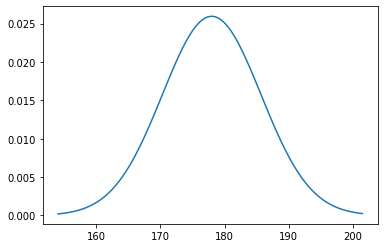

In [4]:
mean = 178
std = 7.7
qs = np.arange(mean - 24, mean + 24, 0.5)
ps = ss.norm(mean, std).pdf(qs)
prior = Pmf(ps, qs)
prior.normalize()
prior.plot()

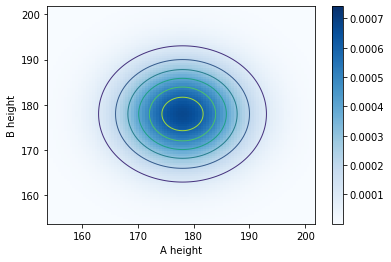

In [5]:
joint = make_joint(prior, prior)
plot_joint(joint)
plot_contour(joint)

In [6]:
x = joint.columns
y = joint.index
X, Y = np.meshgrid(x, y)
imsi = np.where((X > Y), 1, 0)
likelihood = pd.DataFrame(imsi, index=x, columns=y)
likelihood

,154.0,154.5,155.0,155.5,156.0,156.5,157.0,157.5,158.0,158.5,...,197.0,197.5,198.0,198.5,199.0,199.5,200.0,200.5,201.0,201.5
154.0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
154.5,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
155.0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
155.5,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
156.0,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
200.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
200.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
201.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


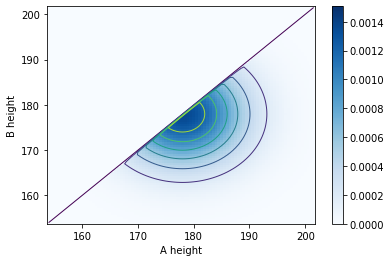

In [7]:
posterior = joint * likelihood
normalize(posterior)
plot_joint(posterior)
plot_contour(posterior)

In [9]:
posterior

,154.0,154.5,155.0,155.5,156.0,156.5,157.0,157.5,158.0,158.5,...,197.0,197.5,198.0,198.5,199.0,199.5,200.0,200.5,201.0,201.5
154.0,0.0,1.012260e-07,1.231528e-07,1.491988e-07,1.799928e-07,2.162288e-07,2.586669e-07,3.081320e-07,3.655120e-07,4.317529e-07,...,5.078525e-07,4.317529e-07,3.655120e-07,3.081320e-07,2.586669e-07,2.162288e-07,1.799928e-07,1.491988e-07,1.231528e-07,1.012260e-07
154.5,0.0,0.000000e+00,1.504623e-07,1.822841e-07,2.199067e-07,2.641782e-07,3.160270e-07,3.764613e-07,4.465654e-07,5.274954e-07,...,6.204703e-07,5.274954e-07,4.465654e-07,3.764613e-07,3.160270e-07,2.641782e-07,2.199067e-07,1.822841e-07,1.504623e-07,1.236732e-07
155.0,0.0,0.000000e+00,0.000000e+00,2.217690e-07,2.675412e-07,3.214024e-07,3.844824e-07,4.580074e-07,5.432970e-07,6.417574e-07,...,7.548718e-07,6.417574e-07,5.432970e-07,4.580074e-07,3.844824e-07,3.214024e-07,2.675412e-07,2.217690e-07,1.830543e-07,1.504623e-07
155.5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.241243e-07,3.893768e-07,4.657978e-07,5.548728e-07,6.582006e-07,7.774847e-07,...,9.145220e-07,7.774847e-07,6.582006e-07,5.548728e-07,4.657978e-07,3.893768e-07,3.241243e-07,2.686717e-07,2.217690e-07,1.822841e-07
156.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.697425e-07,5.619363e-07,6.693961e-07,7.940502e-07,9.379540e-07,...,1.103275e-06,9.379540e-07,7.940502e-07,6.693961e-07,5.619363e-07,4.697425e-07,3.910221e-07,3.241243e-07,2.675412e-07,2.199067e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199.5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.697425e-07,3.893768e-07,3.214024e-07,2.641782e-07
200.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.241243e-07,2.675412e-07,2.199067e-07
200.5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.217690e-07,1.822841e-07
201.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504623e-07


In [10]:
column = posterior[180]
column.sum()

0.03017221271570807